In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

In [2]:
#Read Data
prices = pd.read_csv("data.csv",parse_dates=['date'])
prices

,date,time,open,high,low,close,volume
0,2019-09-02,00:00,1.09899,1.09965,1.09579,1.09696,42316
1,2019-09-03,00:00,1.09658,1.09787,1.09257,1.09733,79803
2,2019-09-04,00:00,1.09737,1.10383,1.09684,1.10348,62939
3,2019-09-05,00:00,1.10348,1.10846,1.10167,1.10340,71471
4,2019-09-06,00:00,1.10340,1.10571,1.10202,1.10245,65458
...,...,...,...,...,...,...,...
123,2020-02-24,00:00,1.08250,1.08720,1.08049,1.08520,54843
124,2020-02-25,00:00,1.08519,1.08901,1.08300,1.08806,60638
125,2020-02-26,00:00,1.08808,1.09085,1.08551,1.08804,38770
126,2020-02-27,00:00,1.08804,1.10065,1.08729,1.09997,43911


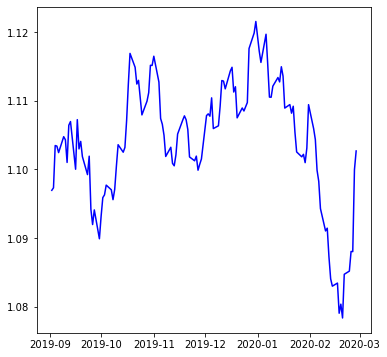

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))

# Add x-axis and y-axis
ax.plot(prices['date'],prices['close'],color='blue')

In [4]:
# dropping unused columns 
prices.drop(["time", "open", "high", "low", "volume"],axis = 1, inplace = True) 

# Store the original dates for plotting the predictions
copy_df = prices.copy()
#copy_df = copy_df.reset_index()

#convert date to ints
prices['date'] = prices['date'].map(mdates.date2num)

# display 
copy_df

,date,close
0,2019-09-02,1.09696
1,2019-09-03,1.09733
2,2019-09-04,1.10348
3,2019-09-05,1.10340
4,2019-09-06,1.10245
...,...,...
123,2020-02-24,1.08520
124,2020-02-25,1.08806
125,2020-02-26,1.08804
126,2020-02-27,1.09997


In [5]:
#Make dataframe for test set's date
arr_date = copy_df['date'].to_list()
idx_test_date = int(0.75*len(arr_date))
df = pd.DataFrame(columns = ['test_date']) 
df['test_date'] = copy_df['date'].iloc[idx_test_date:]
df

,test_date
96,2020-01-16
97,2020-01-17
98,2020-01-20
99,2020-01-21
100,2020-01-22
101,2020-01-23
102,2020-01-24
103,2020-01-27
104,2020-01-28
105,2020-01-29


In [6]:
#Convert data date to list
arr = prices['date'].to_list()
x = [[]]
for j in range(len(arr)):
    arr_sem = []
    arr_sem.append(arr[j])
    x.append(arr_sem)

x.pop(0)
print(x)

#Convert data close price to list
arr_close = prices['close'].to_list()
y = [[]]
for j in range(len(arr_close)):
    arr_sem = []
    arr_sem.append(arr_close[j])
    y.append(arr_sem)
y.pop(0)
print(y)

print(len(x))    
print(len(y))

[[737304.0], [737305.0], [737306.0], [737307.0], [737308.0], [737311.0], [737312.0], [737313.0], [737314.0], [737315.0], [737318.0], [737319.0], [737320.0], [737321.0], [737322.0], [737325.0], [737326.0], [737327.0], [737328.0], [737329.0], [737332.0], [737333.0], [737334.0], [737335.0], [737336.0], [737339.0], [737340.0], [737341.0], [737342.0], [737343.0], [737346.0], [737347.0], [737348.0], [737349.0], [737350.0], [737353.0], [737354.0], [737355.0], [737356.0], [737357.0], [737360.0], [737361.0], [737362.0], [737363.0], [737364.0], [737367.0], [737368.0], [737369.0], [737370.0], [737371.0], [737374.0], [737375.0], [737376.0], [737377.0], [737378.0], [737381.0], [737382.0], [737383.0], [737384.0], [737385.0], [737388.0], [737389.0], [737390.0], [737391.0], [737392.0], [737395.0], [737396.0], [737397.0], [737398.0], [737399.0], [737402.0], [737403.0], [737404.0], [737405.0], [737406.0], [737409.0], [737410.0], [737411.0], [737412.0], [737413.0], [737416.0], [737417.0], [737419.0], [73

In [7]:
#Data scalling using MinMax Scaler for date
scaler = preprocessing.MinMaxScaler()
x_scaledprice = scaler.fit_transform(x)
print(x_scaledprice)

#Data scalling using MinMax Scaler for close price
scaler = preprocessing.MinMaxScaler()
y_scaledprice = scaler.fit_transform(y)
print(y_scaledprice)

#Convert 2d array y to 1d
y = np.array(y_scaledprice)
y_price = y.flatten()

#split data to 75% for train data and 25% for test data 
x_train,x_test,y_train,y_test = train_test_split(x_scaledprice,y_price,test_size=0.25,random_state=None)

[[0.        ]
 [0.00558659]
 [0.01117318]
 [0.01675978]
 [0.02234637]
 [0.03910615]
 [0.04469274]
 [0.05027933]
 [0.05586592]
 [0.06145251]
 [0.07821229]
 [0.08379888]
 [0.08938547]
 [0.09497207]
 [0.10055866]
 [0.11731844]
 [0.12290503]
 [0.12849162]
 [0.13407821]
 [0.1396648 ]
 [0.15642458]
 [0.16201117]
 [0.16759777]
 [0.17318436]
 [0.17877095]
 [0.19553073]
 [0.20111732]
 [0.20670391]
 [0.2122905 ]
 [0.21787709]
 [0.23463687]
 [0.24022346]
 [0.24581006]
 [0.25139665]
 [0.25698324]
 [0.27374302]
 [0.27932961]
 [0.2849162 ]
 [0.29050279]
 [0.29608939]
 [0.31284916]
 [0.31843575]
 [0.32402235]
 [0.32960894]
 [0.33519553]
 [0.35195531]
 [0.3575419 ]
 [0.36312849]
 [0.36871508]
 [0.37430168]
 [0.39106145]
 [0.39664804]
 [0.40223464]
 [0.40782123]
 [0.41340782]
 [0.4301676 ]
 [0.43575419]
 [0.44134078]
 [0.44692737]
 [0.45251397]
 [0.46927374]
 [0.47486034]
 [0.48044693]
 [0.48603352]
 [0.49162011]
 [0.50837989]
 [0.51396648]
 [0.51955307]
 [0.52513966]
 [0.53072626]
 [0.54748603]
 [0.55

The MSE of rbf : 0.022726


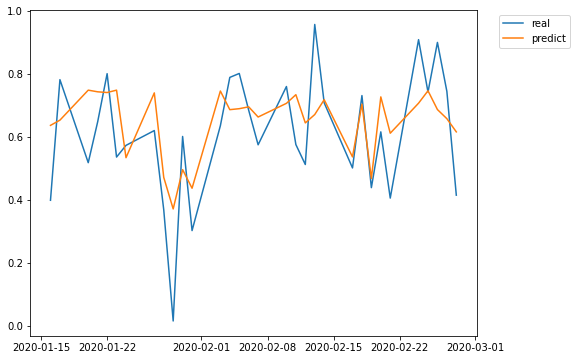

The MSE of poly : 0.034958


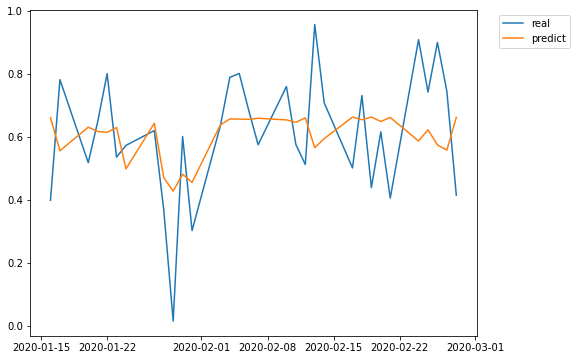

The MSE of linear : 0.038101


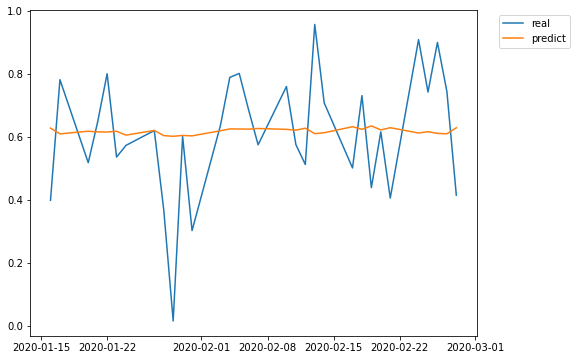

In [10]:
#SVR using kernels
for kernel_arg in ['rbf','poly','linear']:
    if (kernel_arg == 'rbf'):
        clf = svm.SVR(kernel ='rbf',C=1e3,gamma=0.1)
    elif (kernel_arg == 'poly'):
        clf = svm.SVR(kernel ='poly',C=1e3,degree=3)
    else:
        clf = svm.SVR(kernel ='linear',C=1e3)
    y_predict = clf.fit(x_train,y_train).predict(x_test)

    print('The MSE of %s : %f'%(kernel_arg, mean_squared_error(y_test, y_predict)))
    
    #plot data
    plt.subplots(figsize=(8, 6))
    plt.plot(df['test_date'], y_test, label = "real")
    plt.plot(df['test_date'], y_predict, label = "predict")
    plt.legend(bbox_to_anchor=(1.04,1))
    plt.show()